In [17]:
import earthkit.plots as ekp
import earthkit.data as ekd

from datetime import datetime

ekd.settings.set("cache-policy", "user")

today = datetime.today()

request = {
    "variable": [
        "river_discharge_in_the_last_24_hours",
        "runoff_water_equivalent",
        "snow_depth_water_equivalent",
        "soil_wetness_index",
    ],
    "product_type": "control_forecast",
    "date": [today.strftime("%Y-%m-%d")],
    "leadtime_hour": "24",
    "data_format": "grib2",
}
dataset = ekd.from_source("cds", "cems-glofas-forecast", request)
dataset.ls()

2025-03-06 17:19:25,374 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,dis24,surface,0,20250306,0,0-24,cf,0,regular_ll
1,ecmf,rowe,surface,0,20250306,0,0-24,cf,0,regular_ll
2,ecmf,sd,surface,0,20250306,0,24,cf,0,regular_ll
3,ecmf,swir,rootZone,0,20250306,0,24,cf,0,regular_ll


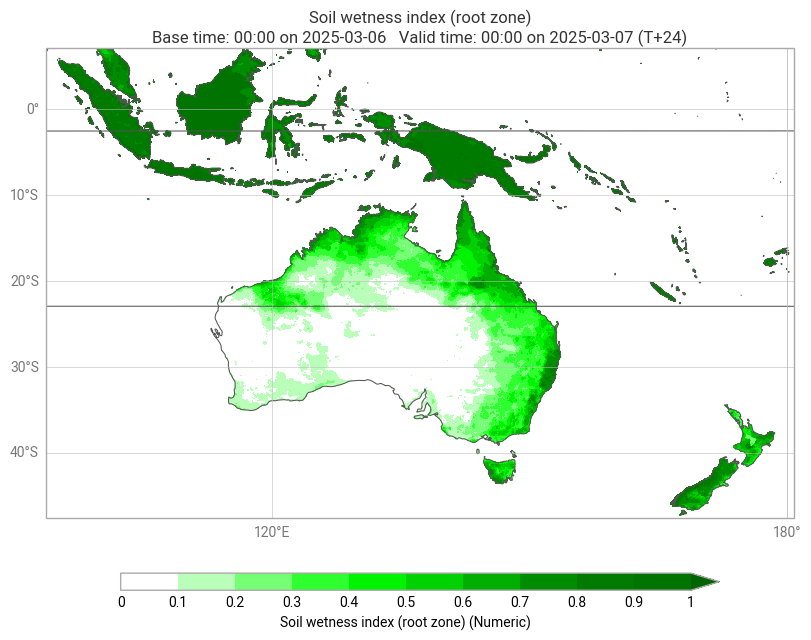

In [18]:
# SWI
data = dataset.sel(shortName="swir")

ekp.quickplot(data, domain=["Indonesia", "Australia", "New Zealand"])

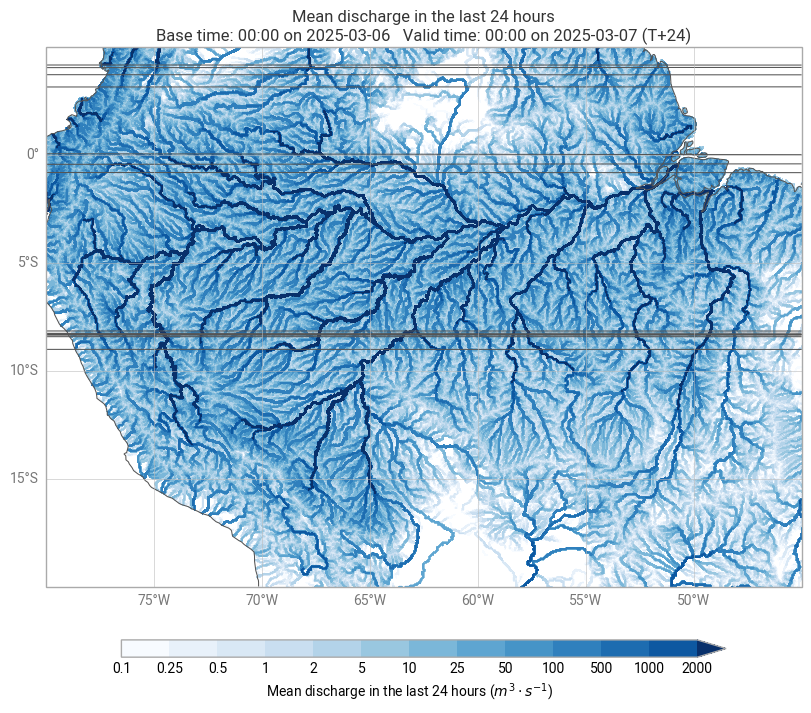

In [2]:
# DIS
data = dataset.sel(shortName="dis24")

ekp.quickplot(data, domain="Amazon")

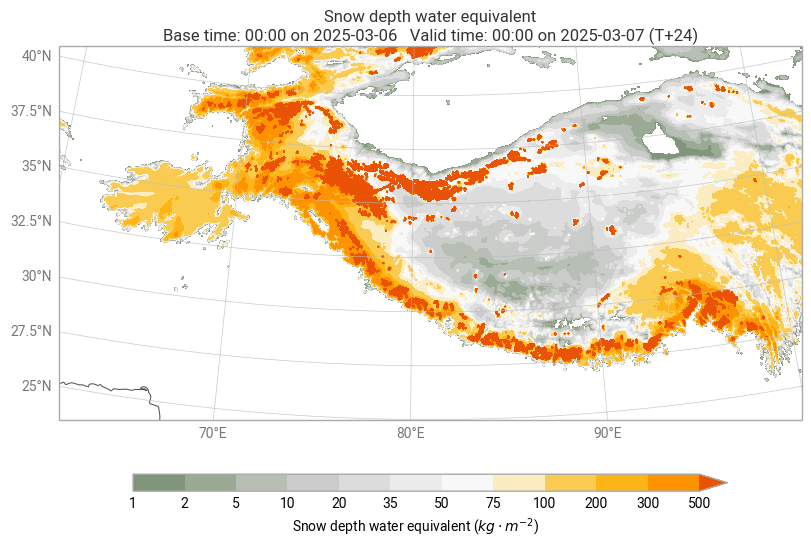

In [ ]:
# SNOW
data = dataset.sel(shortName="sd")

ekp.quickplot(data, domain="Himalayas")

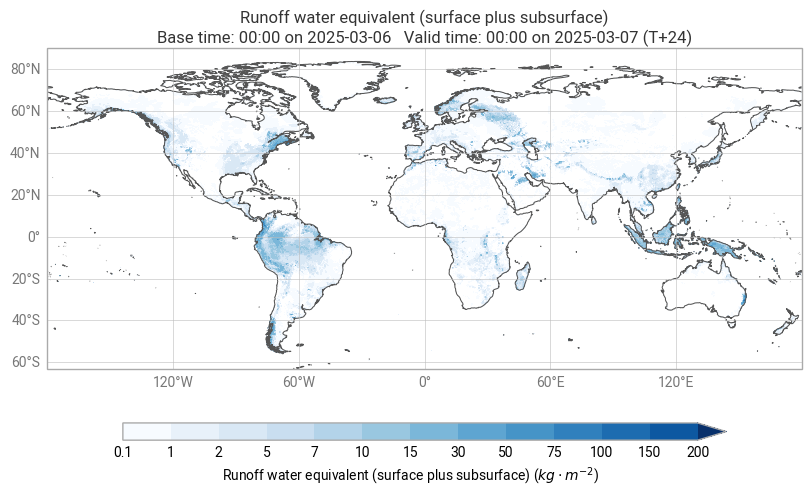

In [4]:
# trun
data = dataset.sel(shortName="rowe")

ekp.quickplot(data)